In [1]:
from utils import plot_similarity_histogram, get_tanimoto_similarity_triangle, plot_histogram_with_two_y_axes, get_actives_inactives_similarity_flat, scaffold_dataset_splitter
import pandas as pd

2024-09-24 14:14:36.404421: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 14:14:36.476406: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 14:14:36.476449: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 14:14:36.477923: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 14:14:36.486427: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 14:14:36.487193: I tensorflow/core/platform/cpu_feature_guard.cc:1

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


# Dataset filtrado general

In [2]:
df = pd.read_pickle("../data/raw/data_chembl34_filtrada_02_09_24.pkl")

# Armado de dataset


In [3]:
target = "CHEMBL2850"
df_target = df[df.target == target]
df_target

,molregno,comp_id,tid,assay_id,target,relation,bioactivity,units,type,potential_duplicate,...,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,np_likeness_score,sequence,sequence_organism,binary_bioactivity
1973,169185,CHEMBL101747,11017,71128,CHEMBL2850,=,18.0,nM,IC50,0,...,0.60,447.0728,C19H22BrN5OS,6.0,2.0,0.0,-1.86,MSGGGPSGGGPGGSGRARTSSFAEPGGGGGGGGGGPGGSASGPGGT...,Homo sapiens,1
2038,169995,CHEMBL101804,11017,71128,CHEMBL2850,=,141.0,nM,IC50,0,...,0.76,268.0960,C14H12N4O2,6.0,2.0,0.0,-1.96,MSGGGPSGGGPGGSGRARTSSFAEPGGGGGGGGGGPGGSASGPGGT...,Homo sapiens,1
2837,169962,CHEMBL102714,11017,660332,CHEMBL2850,=,34.0,nM,IC50,0,...,0.69,370.0276,C19H12Cl2N2O2,4.0,1.0,0.0,-0.65,MSGGGPSGGGPGGSGRARTSSFAEPGGGGGGGGGGPGGSASGPGGT...,Homo sapiens,1
9278,617563,CHEMBL1078178,11017,1642906,CHEMBL2850,>,30000.0,nM,Kd,0,...,0.60,414.1804,C23H22N6O2,8.0,2.0,0.0,-1.88,MSGGGPSGGGPGGSGRARTSSFAEPGGGGGGGGGGPGGSASGPGGT...,Homo sapiens,0
10256,616367,CHEMBL1079175,11017,1642906,CHEMBL2850,>,30000.0,nM,Kd,0,...,0.47,407.1746,C25H21N5O,6.0,3.0,0.0,-0.49,MSGGGPSGGGPGGSGRARTSSFAEPGGGGGGGGGGPGGSASGPGGT...,Homo sapiens,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242992,604615,CHEMBL607707,11017,586967,CHEMBL2850,>,20000.0,nM,Kd,0,...,0.45,467.1524,C24H23ClFN5O2,7.0,2.0,1.0,-1.75,MSGGGPSGGGPGGSGRARTSSFAEPGGGGGGGGGGPGGSASGPGGT...,Homo sapiens,0
1243804,608601,CHEMBL608533,11017,586967,CHEMBL2850,=,2500.0,nM,Kd,0,...,0.29,570.2267,C35H30N4O4,8.0,1.0,2.0,0.66,MSGGGPSGGGPGGSGRARTSSFAEPGGGGGGGGGGPGGSASGPGGT...,Homo sapiens,1
1248856,104230,CHEMBL63803,11017,2216605,CHEMBL2850,=,100.0,nM,IC50,0,...,0.42,360.1335,C19H16N6O2,8.0,2.0,0.0,-1.47,MSGGGPSGGGPGGSGRARTSSFAEPGGGGGGGGGGPGGSASGPGGT...,Homo sapiens,1
1261277,122337,CHEMBL75680,11017,71134,CHEMBL2850,=,1000.0,nM,IC50,0,...,0.76,267.1372,C16H17N3O,4.0,2.0,0.0,-0.10,MSGGGPSGGGPGGSGRARTSSFAEPGGGGGGGGGGPGGSASGPGGT...,Homo sapiens,1


In [4]:
df_target[df_target.duplicated(subset="comp_id")]

,molregno,comp_id,tid,assay_id,target,relation,bioactivity,units,type,potential_duplicate,...,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,np_likeness_score,sequence,sequence_organism,binary_bioactivity


# Estudio de diversidad quimica de compuestos

100%|██████████| 763/763 [00:03<00:00, 238.40it/s] 


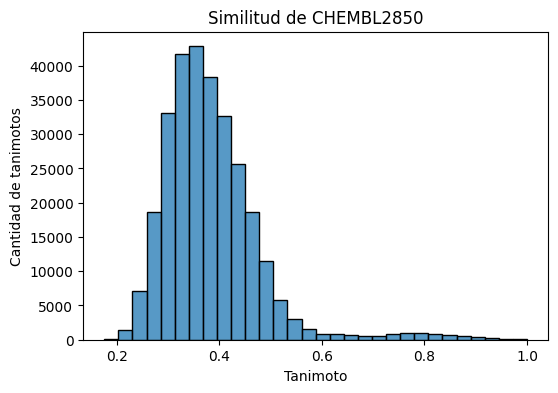

In [5]:
similarity_triangle = get_tanimoto_similarity_triangle(df_target)
plot_similarity_histogram(similarity_triangle,target)

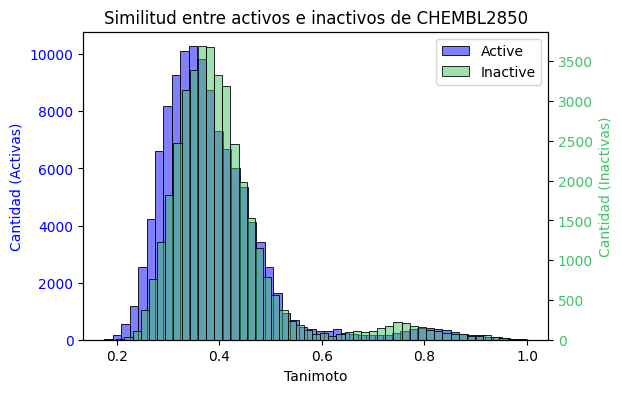

In [6]:
actives, inactives = get_actives_inactives_similarity_flat(df_target, similarity_triangle)

plot_histogram_with_two_y_axes(actives,inactives,target)

splitting

In [7]:
dataset_splited = scaffold_dataset_splitter(df_target)

dataset_splited.to_csv(f"../data/processed/{target}_chemblv34.csv",index=False)